<a href="https://colab.research.google.com/github/Gerundio98/Cedula.Desarrollo-de-Software-II/blob/main/Copia_de_Notebook_Bloque_8_(Completo)_Otras_Arquitecturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Teoría del Deep Learning.**
### **Bloque 8 -** *Otras Arquitecturas de Redes Neuronales*

---
*Consejos de uso de Google Colab:*

*   Puedes consultar la documentación sobre una función escribiendo **?** justo después de una función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*


<p align="justify">🔰<b>¡IMPORTANTE!</b>🔰 Recuerda activar en el entorno de Google Colab la Aceleración por Hardware con GPU. Esto acelerará los tiempos de entrenamiento de tus redes. Para activarlas tendrás que ir al menú <i>'Entorno de ejecución'</i>, luego a <i>'Cambiar tipo de entorno de ejecución'</i> y en el menú emergente que aparece cambia en el desplegable <i>'Acelerador por Hardware'</i> de <i>'None'</i> a <i>'GPU'</i>. Recuerda hacer esto cada vez que empieces a trabajar en Google Colab. 🚀

## 📚 **Aumentación de Datos**
<p align="justify">En el módulo previo, observamos cómo una simple <i>Red Neuronal Multicapa</i> nos permitió alcanzar una tasa de acierto cercana al 96% al predecir números del conjunto de datos MNIST. Sin embargo, surge la pregunta: <b>¿Cuán robusto es realmente nuestro modelo?</b> O en otras palabras, ¿cómo se vería afectado el rendimiento de nuestro modelo ante posibles perturbaciones en los datos de entrada?
<p align="justify">Imaginemos, por ejemplo, que las imágenes que ingresamos en el modelo provienen de fotografías tomadas de dígitos escritos a mano por nosotros. Es probable que algunas de estas imágenes no estén centradas <i>(ej. a)</i>, no tengan una alineación adecuada <i>(ej. b)</i> o presenten problemas de calidad <i>(ej. c)</i>.
<p align="justify"><b>¿Podrían estas perturbaciones afectar el rendimiento de nuestro modelo?</b> ¡Vamos a averiguarlo!
<p align="justify">Lo primero que haremos será cargar nuevamente el conjunto de datos MNIST y diseñar una <i>Red Neuronal Multicapa</i> que aprenda a clasificar nuestras imágenes de números. (Realizar la Actividad 7 previamente a esto resulta más entretenido... 👀)


<centered> ![texto alternativo](https://i.imgur.com/qs86wF1.jpg) </centered>

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils    import to_categorical
from tensorflow.keras.layers   import *
from tensorflow.keras          import Sequential

# Cargamos el dataset MNIST desde la librería de Keras.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reescalamos y preprocesamos las variables.
X_train = X_train / 255
X_test  = X_test  / 255
Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test)

<p align="justify">Con el objetivo de aumentar nuestros datos y evaluar la robustez de nuestro modelo entrenado, utilizaremos algunas herramientas que Keras nos ofrece. En particular, trabajaremos con <i>ImageDataGenerator()</i>, un método de Keras que nos permite cargar nuestros datos <i>(o más bien, generarlos)</i> con las transformaciones que decidamos aplicar, como traslaciones, rotaciones, entre otros.
<p align="justify">El funcionamiento de <i>ImageDataGenerator()</i> consiste en crear un objeto donde configuraremos las transformaciones que queremos aplicar. Posteriormente, especificaremos la fuente de los datos utilizando el método <i>.flow(...)</i>.
<p align="justify">Para comprobar la robustez de nuestro modelo frente a perturbaciones, crearemos un generador que no modifique nuestras imágenes para los datos de entrenamiento, y lo utilizaremos para entrenar nuestro modelo con datos normales. Luego, generaremos un segundo generador que sí aplique perturbaciones en las imágenes, denominado generador de prueba, y lo emplearemos para evaluar el desempeño del modelo al introducir datos con perturbaciones.


(32, 28, 28, 1) (32, 10) 



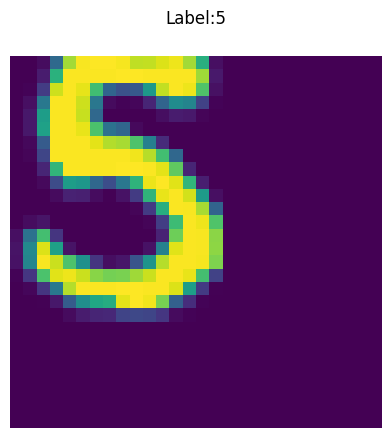

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creamos el generador de imágenes de entrenamiento. En este caso, este generador
# no va a introducir ninguna perturbación en los datos.
train_idg = ImageDataGenerator()

# Cargamos las imágenes a nuestro preprocesador. Hay que tener en cuenta
# que el generador requiere que nuestras imágenes tengan 4 dimensiones que
# cumplan lo siguiente: [n_imágenes, altura, ancho, nº_canales_color].
# Por eso se añade una nueva dimensión con np.newaxis a nuestros datos.
gen_train_images = train_idg.flow(X_train[..., np.newaxis], Y_train)

# Creamos el generador de imágenes de evaluación. Este generador sí va a
# introducir perturbaciones de 25% traslación horizontales y verticales.
test_idg = ImageDataGenerator(width_shift_range=0.25, height_shift_range=0.25)

# Cargamos las imágenes a nuestro preprocesador.
gen_test_images = test_idg.flow(X_test[..., np.newaxis], Y_test)


# Una vez tenemos los generadores creados, podemos obtener imágenes al igual que
# hacíamos con los generadores de Python (de hecho, lo son) con el método next(...)
# Cada vez que lo llamemos el método nos devolverá un lote de 32 imágenes como
# variable de entrada y sus etiquetas de salida.
batchX, batchY = next(gen_test_images)

# Comprobamos que las dimensiones son las esperadas.
print(batchX.shape, batchY.shape, '\n')

# Visualizamos el contenido de alguna de las imágenes del lote. Podrás ver que
# cada vez que ejecutes la celda, esta imagen cambiará. Y es que el generador
# se va a ocupar de que la obtención de imágenes desde nuestros datos sea
# aleatoria. Como extraemos imágenes del generador de test, podrás comprobar
# también que estas imágenes ya se presentan con la traslación de 25% aleatoria.

plt.matshow(batchX[0, :, :, 0])
plt.title('Label:' + str(np.argmax(batchY[0])))
plt.axis(False)
plt.show()

<p align="justify">Ahora que ya tenemos creados nuestros generadores de datos de entrenamiento y prueba, con las perturbaciones correspondientes, vamos a generar ahora nuestra <b>Red Neuronal Multicapa</b>. Fíjate cómo podemos integrar a nuestros generadores de datos dentro del método <i>.fit(...)</i>, para que ahora el entrenamiento de la red pueda tomar los datos directamente desde ahí. Pasaremos el generador de entrenamiento como datos de entrenamiento, y al generador de prueba, con sus perturbaciones, como datos de prueba.

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

# Planteamos la arquitectura de la red.
model = Sequential()

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(10,  activation='softmax'))

# Compilamos a la red neuronal.
model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

# Entrenamos a la red neuronal usando a nuestros generadores como suministradores
# de datos de entrenamiento y prueba.
model.fit(gen_train_images, validation_data=gen_test_images, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2321 - accuracy: 0.9304 - val_loss: 4.7340 - val_accuracy: 0.2201
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1008 - accuracy: 0.9694 - val_loss: 5.0728 - val_accuracy: 0.2413
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0708 - accuracy: 0.9781 - val_loss: 5.8066 - val_accuracy: 0.2620
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0568 - accuracy: 0.9830 - val_loss: 5.7481 - val_accuracy: 0.2529
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 6.2482 - val_accuracy: 0.2644
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 6.7258 - val_accuracy: 0.2762
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 7.9671 - val_ac

<p align="justify">Fíjate cómo la calidad de los resultados de prueba es muchísimo peor que la obtenida con los de entrenamiento. La tasa de acierto para los nuevos datos <b>no supera ni el 30%</b>, cuando los datos de entrenamiento están cerca de lograr <b>el 100%</b>.

<p align="justify">Parece por tanto que el modelo cuando recibe imágenes que tienen algo de traslación es incapaz de clasificar correctamente a los números. Decimos por tanto que el modelo es poco robusto ante perturbaciones de movimiento. <i>¿Cómo podríamos solucionar esto?</i> Pues una primera propuesta sería volver a entrenar a la <b>Red Neuronal Multicapa</b>, pero con datos que también tengan esas perturbaciones. Es decir, entrenar a la red con <b>datos aumentados.</b>

<p align="justify">Para hacer esto, vamos a crear un nuevo generador de datos de entrenamiento que sí contenga también perturbaciones de traslación.

In [ ]:
# Creamos el generador de imágenes de entrenamiento.
train_idg = ImageDataGenerator(width_shift_range=0.25, height_shift_range=0.25)

# Cargamos las imágenes a nuestro preprocesador.
gen_train_images = train_idg.flow(X_train[..., np.newaxis], Y_train)

# Creamos el generador de imágenes de evaluación.
test_idg = ImageDataGenerator(width_shift_range=0.25, height_shift_range=0.25)

# Cargamos las imágenes a nuestro preprocesador.
gen_test_images = test_idg.flow(X_test[..., np.newaxis], Y_test)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

# Planteamos la arquitectura de la red.
model = Sequential()

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(10,  activation='softmax'))

# Compilamos a la red neuronal.
model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

# Entrenamos a la red neuronal usando los generadores de datos.
model.fit(gen_train_images, validation_data=gen_test_images, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.7384 - accuracy: 0.7544 - val_loss: 0.3816 - val_accuracy: 0.8812
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3439 - accuracy: 0.8923 - val_loss: 0.2803 - val_accuracy: 0.9125
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2805 - accuracy: 0.9119 - val_loss: 0.2372 - val_accuracy: 0.9285
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2512 - accuracy: 0.9208 - val_loss: 0.2378 - val_accuracy: 0.9254
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2275 - accuracy: 0.9301 - val_loss: 0.2011 - val_accuracy: 0.9366
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2187 - accuracy: 0.9319 - val_loss: 0.1925 - val_accuracy: 0.9422
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2016 - accuracy: 0.9376 - val_loss: 0.1812 -

## 👁‍🗨 **Redes Neuronales Convolucionales**

<p align="justify">Como se puede ver, ahora la tasa de acierto tanto de entrenamiento como de prueba evolucionan a la par, superando el 90% de la tasa de acierto. Parece que la estrategia de entrenar al modelo con datos aumentados causa buenos efectos.

<p align="justify">Sin embargo, como hemos visto en el bloque teórico, a la hora de analizar imágenes tenemos mejores alternativas. Si trabajamos con imágenes, una alternativa más eficiente en el número de parámetros y más robusta en la comprensión de imágenes, son las Redes Neuronales Convolucionales.

<p align="justify">Una Red Neuronal Convolucional se compone de dos parte principales:

- <p align="justify"><b>El extractor de patrones</b>, la parte de la red conformada por las llamadas capas convolucionales (Conv2D) encargadas de escanear las imágenes con una serie de filtros. Estos filtros están compuestos por los parámetros que vamos a optimizar, y es a través de este proceso, que estos filtros aprenden los patrones necesarios a reconocer para resolver la tarea. Cada filtro aprenderá un patrón (e.g. un ojo, una esquina, una textura, una cara, etc).

- <p align="justify"><b>El clasificador de patrones</b>, una vez la parte anterior de la red ha aprendido a extraer todos los patrones de nuestra imagen, ahora esta segunda parte se compone de una Red Neuronal Multicapa típica, que tomará como input los patrones reconocidos y aprenderá a utilizar esta información para resolver la tarea para la que la estamos entrenando.


Vamos a ver cómo podemos implementar una <b>Red Neuronal Convolucional.</b> 👇

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

# Empezamos a construir a nuestro modelo igual que antes, utilizando el método
# Sequential(), puesto que vamos a volver a agregar capas que serán ejecutadas
# de manera secuencial, donde el output de una será el input de la siguiente.
model = Sequential()

# -- Extractor de patrones -- Esta parte de la red está conformado por capas
# convolucionales, que por su nombre ya se intuye que son las más importantes
# de esta arquitectura. Las capas convolucionales se componen de filtros, cuya
# cantidad y tamaño podemos definir con filters= y kernel_size=. En este caso
# fíjate cómo vamos incrementando el número de filtros entre más capas añadimos.

# Esto tiene sentido puesto que entre más profunda es nuestra red, más patrones
# avanzados podemos componer con los patrones anteriores, y por eso tiene sentido
# tener más filtros. El tamaño de estos filtros en este caso son de 3x3 píxeles,
# y el tamaño de esto dependerá de cuán grande sean nuestras imágenes de entrada.

# Es habitual encontrar filtros de 1x1, 3x3, 5x5, 7x7 u 11x11. El atributo strides=2
# lo que indica es que cada filtro irá moviéndose dando saltos de 2 píxeles por la
# imagen, lo cual produce que la resolución de alto y ancho se reduzca a la mitad
# tras el paso por cada capa. Reducir así el tamaño de las imágenes es recomendable.

model.add(Conv2D(filters=10, kernel_size=3, strides=2, padding="same", activation='relu'))
model.add(Conv2D(filters=20, kernel_size=3, strides=2, padding="same", activation='relu'))
model.add(Conv2D(filters=30, kernel_size=3, strides=2, padding="same", activation='relu'))

# -- Clasificador de patrones -- Una vez las imágenes han pasado por las capas
# convolucionales, lo que tendremos será el resultado de haber detectado los patrones
# contenidos en ellas. Ahora, podemos añadir capas Densas, para crear una sencilla
# Red Neuronal Multicapa, que tome estos patrones y los procese similar a cómo
# hemos trabajado con datos tabulares y redes neuronales en el bloque anterior.

# Para ello, tendremos que convertir las imágenes resultantes de la última capa
# Conv2D a vectores unidimensionales, que como sabemos, son los que las capas
# densas admiten. Para ello, añadiendo una capa Flatten() podemos conseguir vectorizar
# las imágenes. Después, ya podemos añadir una o dos capas Densas y finalmente
# la capa de salida configurada correctamente.

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10,  activation='softmax'))

# Una vez la red está diseñada, compilamos el modelo igual que antes.
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics='acc')

# Y lo entrenamos suministrando nuestros datos. En este caso usando los generadores.
model.fit(gen_train_images, validation_data=gen_test_images, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 14ms/step - loss: 0.5440 - acc: 0.8253 - val_loss: 0.2307 - val_acc: 0.9287
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2210 - acc: 0.9332 - val_loss: 0.1730 - val_acc: 0.9480
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1742 - acc: 0.9473 - val_loss: 0.1300 - val_acc: 0.9574
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1482 - acc: 0.9546 - val_loss: 0.1153 - val_acc: 0.9628
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1322 - acc: 0.9595 - val_loss: 0.1065 - val_acc: 0.9673
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1218 - acc: 0.9617 - val_loss: 0.0975 - val_acc: 0.9707
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1098 - acc: 0.9660 - val_loss: 0.0882 - val_acc: 0.9719
Epoch 8/10
1875/1875 [==========================

<p align="justify">Al entrenar el modelo vemos que su rendimiento supera a lo que hemos conseguido previamente con la Red Neuronal Multicapa con aumentación de datos. De hecho, parece que la red podría seguir mejorando su rendimiento <i>(esto se deduce al ver cómo el <b>val_acc</b> sigue aumentando en las últimas Epochs)</i>.
<p align="justify">Podemos entrenar a la red unas <b>10 epochs más</b> volviendo a llamar al método <i>.fit(...)</i>

In [ ]:
model.fit(gen_train_images, validation_data=gen_test_images, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0854 - acc: 0.9732 - val_loss: 0.0738 - val_acc: 0.9769
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0806 - acc: 0.9747 - val_loss: 0.0767 - val_acc: 0.9751
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0794 - acc: 0.9754 - val_loss: 0.0664 - val_acc: 0.9779
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0789 - acc: 0.9758 - val_loss: 0.0742 - val_acc: 0.9768
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0731 - acc: 0.9775 - val_loss: 0.0627 - val_acc: 0.9797
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0721 - acc: 0.9776 - val_loss: 0.0601 - val_acc: 0.9812
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0697 - acc: 0.9790 - val_loss: 0.0586 - val_acc: 0.9808
Epoch 8/10
1875/1875 [==========================

# **Actividad Evaluable 8.** Otras Arquitecturas.

<p align="justify">Vamos a poner en práctica todas las funcionalidades de Keras vistas en este bloque. Para ello, vamos a trabajar con un dataset similar al <b>MNIST</b> de número, pero en su alternativa de prendas de ropa: el <b>Fashion MNIST</b>. Este dataset, a diferencia del de números, está compuesto de imágenes de distintas prendas de ropa (<i>10 en total</i>) de 28x28 píxeles.

---

**Tu tarea:** Completa las siguientes tareas de análisis aplicadas sobre el dataset <b>Fashion MNIST</b>:

1. <p align="justify">Crea dos generadores de imágenes (<i>ImageDataGenerators(...)</i>) que añadan únicamente perturbaciones en los datos de entrenamiento, no en los de validación. Puedes elegir qué perturbaciones añadir consultado en la documentación las distintas transformaciones que hay (<i>por ejemplo, puedes probar con Traslación y Rotación</i>). Una vez creado los generadores, visualiza una imagen de cada uno de ellos.

2. <p align="justify">Diseña un modelo con Keras que sea capaz de clasificar a nuestras imágenes. Aquí puedes optar por diseñar una <b>Red Neuronal Multicapa</b> típica, o algo más avanzado como una <b>Red Neuronal Convolucional</b> (<i>puedes tomar el código de los ejemplos anteriores</i>). En cualquier caso, deberás de añadir un callback de <i>EarlyStopping</i> que monitorice la variable <i>'val_loss'</i> con una paciencia de 3 steps. Lo más probable es que este <i>EarlyStopping</i> to llegue a saltar.

4. <p align="justify">Finalmente, tras entrenar a tu modelo, guarda a tu modelo y vuélvelo a cargar en una variable diferente desde la que deberás de comprobar que aún está entrenado haciendo una predicción o evaluándolo con el método <i>.evaluate()</i>

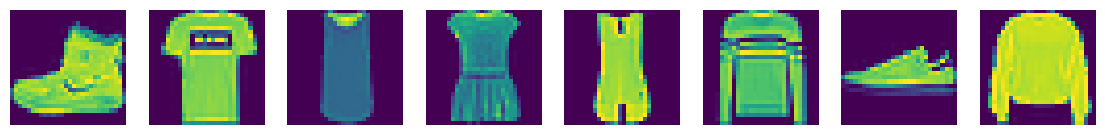

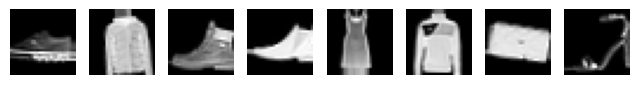

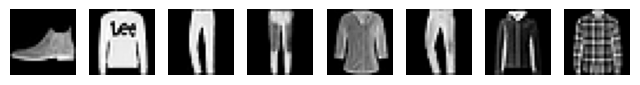

Epoch 1/20
60000/60000 [==============================] - 307s 5ms/step - loss: 0.5524 - accuracy: 0.7892 - val_loss: 0.4549 - val_accuracy: 0.8367
Epoch 2/20
60000/60000 [==============================] - 288s 5ms/step - loss: 0.4508 - accuracy: 0.8322 - val_loss: 0.4132 - val_accuracy: 0.8567
Epoch 3/20
60000/60000 [==============================] - 306s 5ms/step - loss: 0.4393 - accuracy: 0.8367 - val_loss: 0.3927 - val_accuracy: 0.8659
Epoch 4/20
60000/60000 [==============================] - 290s 5ms/step - loss: 0.4390 - accuracy: 0.8377 - val_loss: 0.4560 - val_accuracy: 0.8386
Epoch 5/20
60000/60000 [==============================] - 307s 5ms/step - loss: 0.4422 - accuracy: 0.8372 - val_loss: 0.3953 - val_accuracy: 0.8641
Epoch 6/20
10000/10000 [==============================] - 29s 3ms/step - loss: 0.3927 - accuracy: 0.8659
Test accuracy: 0.8659


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10000/10000 [==============================] - 29s 3ms/step - loss: 0.3927 - accuracy: 0.8659
Loaded model accuracy: 0.8659
313/313 [==============================] - 1s 3ms/step
Predicción de la primera imagen: [2.5817076e-10 4.6084175e-10 1.1783819e-09 2.0207424e-11 2.7952623e-11
 3.4897198e-04 9.3698311e-09 4.8357176e-04 2.8823797e-07 9.9916720e-01]


In [ ]:
from tensorflow.keras.datasets import fashion_mnist


# Cargamos el dataset MNIST desde la librería de Keras.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# Reescalamos y preprocesamos las variables.
X_train = X_train / 255
X_test  = X_test  / 255
Y_train = to_categorical(Y_train)
Y_test  = to_categorical(Y_test)

# Visualizamos alguna de las prendas del dataset.
fig, axs = plt.subplots(1, 8, figsize=(14, 2))
for i in range(len(axs)):
  axs[i].matshow(X_train[i])                     # Visualiza las imágenes.
  axs[i].axis('off')                             # Oculta los ejes de la gráfica.


# COMIENZA AQUÍ TU CÓDIGO #

# Por si no se corren los anteriores imports.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# COMIENZA AQUÍ TU CÓDIGO #

# Crear generadores de imágenes con perturbaciones en los datos de entrenamiento
train_datagen = ImageDataGenerator(
    rotation_range=10,  # Rotación aleatoria de hasta 10 grados
    width_shift_range=0.1,  # Traslación horizontal aleatoria
    height_shift_range=0.1  # Traslación vertical aleatoria
)

test_datagen = ImageDataGenerator()

# Redimensionar datos para que encajen en el generador de imágenes
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Visualizar una imagen del generador de entrenamiento
train_generator = train_datagen.flow(X_train, Y_train, batch_size=1)
test_generator = test_datagen.flow(X_test, Y_test, batch_size=1)

# Visualizar una imagen de entrenamiento con perturbaciones
plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    batch = next(train_generator)
    plt.imshow(batch[0][0].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

# Visualizar una imagen de validación sin perturbaciones
plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

# Diseño del modelo con Keras (Red Neuronal Convolucional)
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Evaluación del modelo
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.4f}')

# Guardar el modelo
model.save('fashion_mnist_model.h5')

# Cargar el modelo guardado
loaded_model = load_model('fashion_mnist_model.h5')

# Evaluar el modelo cargado
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(test_generator)
print(f'Loaded model accuracy: {loaded_test_acc:.4f}')

# Predicción con el modelo cargado (opcional)
predictions = loaded_model.predict(X_test)
print(f'Predicción de la primera imagen: {predictions[0]}')
